## Aprendizaje automático. Fundamentos
___

### 1. Aprender sólo es estimación de parámetros
---
En general, el aprendizaje automático consiste en recolectar una serie de datos, elegir un modelo, y estimar sus parámetros de forma que nos permita realizar predicciones sobre nuevos datos

<br>

![](data/image-lect/learning_process.png)

<br>



#### 1.1 El problema
---
Resulta que, en un anticuario, compramos un antiguo termómetro analógico de pared. Perfecto para decorar nuestro estudio pero con un pequeño problema. No sabemos cuáles son las unidades de su escala termométrica!! Es decir, podemos leer una valor en el termómetro (por ejemplo, 55, 60, 32,...) pero no sabemos en qué unidades están.

<br>

![](data/image-lect/termom.png)

<br>

En todo caso, tenemos un plan: construiremos un _dataset_ a partir de medidas tomadas en el termómetro recién adquirido y la temperatura correspondiente en una escala conocida (por ejemplo, Celsius), elegiremos un modelo, ajustaremos los "pesos" del modelo iterativamente hasta que la medida del error sea suficientemente pequeña y, así, seremos finalmente capaces de interpretar las nuevas lecturas en unidades conocidas.


#### 1.2 Recolectando datos
---
Empezaremos tomando nota de la temperatura actual en un termómetro Celsius y la correspondiente medida en nuestro nuevo termómetro. 

Después de un par de semanas de medidas, tenemos algo como lo siguiente:

In [40]:
import torch

# temperaturas ºC
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]

# temperaturas en escala desconocida (unknown)
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

#### 1.3 Visualizando los datos
---
Visualizar el dataset (cuando es posible) suele ser de gran ayuda para apreciar o intuir ciertos patrones en los datos

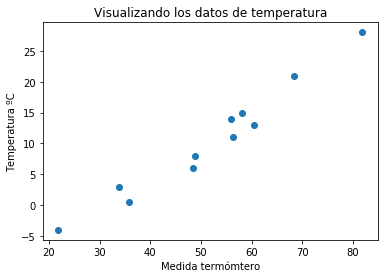

In [41]:
from matplotlib import pyplot as plt

plt.title("Visualizando los datos de temperatura")
plt.ylabel("Temperatura ºC")
plt.xlabel("Medida termómtero")
plt.scatter(t_u.numpy(), t_c.numpy())
plt.show()

Viendo la gráfica anterior, podemos intuir cierta correlación lineal en los datos, lo que nos llevaría a pensar que un modelo lineal para representar dicha relación sería los más apropiado.

#### 1.4 Aplicando un modelo lineal
---
Nos hemos decantado entonces por emplear un modelo lineal, el más simple de todos, para representar la relación entre las dos magnitudes (temperatura medida en ºC y en nuestro termómetro sin unidades).

Según este modelo, una temperatura en ºC vendría dada por la multiplicación de la temperatura obtenida en el termómetro sin escala (t_u) por un factor (_w_), más la adición de una constante (_b_):

<br>

```t_c = w * t_u + b```

<br>

La ecuación anterior no es más que la ecuación de una recta de pendiente **_w_** y desplazamiento **_b_** respecto al origen (en ML, esos términos se suelen denomianar _weight_ y _bias_).

Así, nuestro problema se reduce a encontrar los valores de esos dos parámetros (_w_ y _b_) que definan **la recta que más se aproxima** a los datos observados experimentalmente. Si conseguimos esto, podremos estimar la temperatura en ºC para cualquier posible medida de nuestro termómetro. No tendríamos más que resolver la simple ecuación anterior para la medida leída.


#### 1.5 Estimando los parámetros
---
Una forma simple de estimar los parámetros de nuestro modelo sería haciéndolo de forma manual por prueba y error. Es decir, ir ajustando de forma iterativa los parámetros y visualizando el resultado, hasta encontrar aquella pareja (_w_, _b_) que más se acerque al resultado deseado.

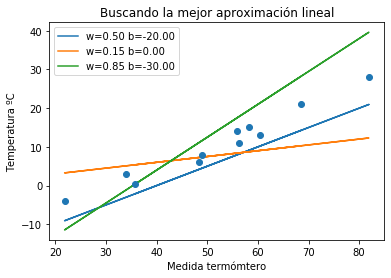

In [42]:
from matplotlib import pyplot as plt

# medidas de los termómetros
plt.scatter(t_u, t_c, zorder=2)

# rectas (w, b)
rectas = [(0.5,-20), (0.15,0), (0.85,-30)]
for w,b in rectas:
    t_r = w*t_u + b
    plt.plot(t_u, t_r, label=f'w={w:.2f} b={b:.2f}', zorder=1)

plt.title("Buscando la mejor aproximación lineal")
plt.ylabel("Temperatura ºC")
plt.xlabel("Medida termómtero")
plt.legend()    
plt.show()

#### 1.6 Calculando el error (_losss function_)
----
En el caso anterior, ¿cómo sabremos cuando hemos dado con la mejor pareja de parámetros (_w_,_b_)? ¿cómo sabemos que una pareja es mejor que la otra?

Y, ¿si no podiéramos visualizar nuestro conjunto de datos? (como. por ejemplo, cuando trabajamos con 3 o más parámetros _w_)

En principio, lo que haremos será determinar el **error** entre las medidas reales y las medidas obtenidas por nuestro modelo. A continuación, ajustaremos nuevamente nuestros parámetros de forma que el error obtenido en la siguiente estimación sea menor. En esencia, esto es lo que se hace durante un proceso de **entrenamiento** de un modelo de ML.

Pero vayamos por partes, ¿cómo calculamos el error de nuestro modelo?

Básicamente, el cálculo del error (_loss_) no es más que una medida de la **diferencia** entre el valor _esperado_ y el valor _obtenido_. Dado que sólo nos interesa la _magnitud_ del error y no su _dirección_, se suele usar el **cuadrado de la diferencia**. Otra ventaja de emplear una función cuadrática es que _penaliza_ más los errores grandes que los pequeños.

<br>

![](data/image-lect/loss_functions.png)

<br>

Vamos a definir un par de funciones que nos permitan obtener tanto las estimaciones de nuestro modelo como el error de dichas estimaciones. El error se devuelve como la media de los cuadrados de los errores. Es lo que se conoce como **Error Cuadrático Medio (_ECM_)**

In [43]:
def model(t_u, w, b):
    """Evalúa nuestro modelo.
    
    params:
        t_u tensor de medidas de nuestro termómetro de unidades desconocidas
        w   weight (param_1)
        b   bias   (param_0)
        
    returns:
        tensor con las estimaciones en ºC
    """
    return w * t_u + b

def loss_fn(t_p, t_c):
    """Función de pérdida. Calcula el error cuadrático medio.
    
    params:
        t_p tensor de predicciones del modelo
        t_c tensor de valores reales
        
    returns:
        media del cuadrado de los errores
    """
    return ((t_c - t_p)**2).mean().item()

Vamos a usar nuestras nuevas funciones para calcular los errores de las tres rectas anteriores y determinar cuál es la que mejor se aproxima a los valores medidos experimentalmente.

In [44]:
# calculamos el error del modelo para cada pareja de parámetros
errors = []
for w,b in rectas:
    t_p = model(t_u, w, b)
    errors.append(loss_fn(t_p, t_c))
    
# comparamos los errores de los diferentes modelos
print(f"{'w':^7s} {'b':^7s} {'ECM':^7s}")
print("------- ------- -------")
for i in range(len(errors)):
    w,b = rectas[i]
    e = errors[i]
    print(f"{w:>7.2f} {b:>7.2f} {e:>7.2f}")

   w       b      ECM  
------- ------- -------
   0.50  -20.00   24.44
   0.15    0.00   48.91
   0.85  -30.00   40.66


#### 1.7 Reduciendo el error
---
Hemos definido la manera de determinar qué tan bueno es nuestro modelo. Lo que necesitamos ahora es un "mecanismo" que nos permita optimizar los parámetros del modelo de forma que ese error se reduzca al mínimo.

Para minimizar la función de error respecto a los parámetros se aplica lo que se conoce como **descenso de gradiente**. En realidad es un concepto muy simple y que escala sorprendentemente bien en modelos neuronales de millones de parámetros.

Para hacernos una idea de cómo funciona este método, vamos a imaginarnos la situación de la siguiente figura:

<br>

![data/image-lect/grad_intuition.png](data/image-lect/grad_intuition.png)

<br>

Imagina que estamos al frente de una máquina manejando dos controles que nos permiten modificar los valores de _w_ y _b_. Al mismo tiempo, en la pantalla podemos ver el valor del error actual. Nos piden que _minimicemos_ ese valor. En principio, no sabemos qué efecto producen los mandos sobre el error, así que empezamos a girarlos hasta encontrar la dirección que reduce el error observado. Observamos como, cuando sobrepasamos el mínimo, el error vuelve a crecer, por lo que debemos girar los mandos en el otro sentido. Por tanto, cuando estamos próximos a ese valor mínimo, debemos girar lentamente los mandos, haciendo pequeños ajustes, para evitar pasarnos de largo. Finalmente, conseguimos estabilizar (converger) la máquina (modelo) en el valor de error mínimo.

El simple escenario que acabamos de describir es, en esencia, lo que denominamos **descenso de gradiente**. El proceso sería el siguiente:
<br><br>
1. **Calcular** una pequeña "tasa de cambio" (_rate of change_) para cada parámetro (cuánto y en qué dirección giramos cada mando) que nos lleve a reducir el error.
<br><br>
2. **Actualizar** nuestros parámetros sumando (o restando) esta pequeña cantidad.
<br><br>
3. **Repetir** el proceso (pasos 1 y 2) hasta que alcancemos el valor de error **mínimo**.
<br><br>

Ahora bien, ¿cómo podemos automatizar el cálculo de esa "tasa de cambio"?

Una forma sería calculando el error del modelo para pequeñas modificaciones (δ) de los parámetros, y obteniendo una media de la diferencia manteniendo el signo. El valor obtenido lo emplearíamos para actualizar el parámetro correspondiente:







In [45]:
# 1. Calculate loss rate of change
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) -
                         loss_fn(model(t_u, w - delta, b), t_c)) / (2*delta)
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) -
                         loss_fn(model(t_u, w, b - delta), t_c)) / (2*delta)

# 2. Update parameters
learning_rate = 1e-2
w -= learning_rate * loss_rate_of_change_w
b -= learning_rate * loss_rate_of_change_b

Sin embargo, calcular la tasa de cambio mediante la evaluación repetida del modelo y el error usando estos pequeños δ's no escala bien en modelos de múltiples parámetros. Además, es difícil determinar cuál es el valor apropiado de dichos intervalos. De hecho, a medida que nos acercamos al mínimo, esos intervalos deberían irse haciendo paulatinamente más pequeños.

#### 1.8 Descenso de gradiente
---
Si recordamos nuestras clases de cálculo de bachillerato, la **derivada** de una función en un punto es la **razón de cambio** instantáneo (_ratio_ Δy/Δx cuando Δx tiende a 0) con la que varía el valor de dicha función en el entorno de dicho punto. Es decir, si crece o decrece y con qué velocidad. Puede interpretarse geométricamente como la **pendiente** de la recta tangente a la gráfica de la función en dicho punto.

<br>

![data/image-lect/derivada.png](data/image-lect/derivada.png)

<br>

En un modelo con dos o más parámetros, como el nuestro, podríamos calcular las derivadas de la función de error (_loss function_) con respecto a cada parámetro y almacenarlas en un vector de derivadas: el **gradiente**

<br>

![data/image-lect/grad_calc.png](data/image-lect/grad_calc.png)

<br>

Así pues, para obtener el gradiente, deberemos calcular las derivadas parciales de la función de error respecto al modelo y multiplicarlas por las derivadas parciales del modelo respecto a los parámetros.

In [46]:
def dloss_fn(t_p, t_c):
    # derivative of the losss with respect to its input (output of the model)
    return 2 * (t_p - t_c) / t_p.size(0)

def dmodel_dw(t_u, w, b):
    # derivative of the model with respect to param w
    return t_u

def dmodel_db(t_u, w, b):
    # derivative of the model with respect to param b
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])   


#### 1.9 Entrenando el modelo
---
Ya tenemos todo lo necesario para optimizar nuestros parámetros. Empezando por un valor arbitrario de los mismos, podemos iterar actualizando sus valores hasta que alcancemos un número predeterminado de iteraciones o hasta que _w_ y _b_ dejen de cambiar.

Por ejemplo, vamos a hacerlo para un número de iteraciones o **épocas**:

In [104]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=False):
    t_params_list = torch.zeros([n_epochs, 2])
    t_loss_list = torch.zeros(n_epochs)
    
    for epoch in range(1, n_epochs+1):
        w, b = params
        
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        
        # update parameters
        params -= learning_rate * grad
        
        # almacenamos los resultado de cada época para analizar
        t_loss_list[epoch-1] = loss
        t_params_list[epoch-1] = params # new params learned
        
        if print_params:
            print(f'Epoch {epoch}: loss {loss:.3f}')  
            print(f'\tParams:\t{params}:\n\tGrad:\t{grad}')         
    
    return t_loss_list, t_params_list

Vamos a invocar a entrenar nuestro modelo partiendo de unos parámetros arbitrarios (p.e., \[1,0])y a ver qué resultado obtenemos:

In [105]:
params = torch.tensor([1.0, 0.0])
t_loss, t_params = training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = params,
    t_u = t_u,
    t_c = t_c,
    print_params=True)

Epoch 1: loss 1763.885
	Params:	tensor([-44.1730,  -0.8260]):
	Grad:	tensor([4517.2964,   82.6000])
Epoch 2: loss 5802484.500
	Params:	tensor([2568.4011,   45.1637]):
	Grad:	tensor([-261257.4062,   -4598.9702])
Epoch 3: loss 19408029696.000
	Params:	tensor([-148527.7344,   -2616.3931]):
	Grad:	tensor([15109614.0000,   266155.6875])
Epoch 4: loss 64915905708032.000
	Params:	tensor([8589999.0000,  151310.8906]):
	Grad:	tensor([-8.7385e+08, -1.5393e+07])
Epoch 5: loss 217130525461053440.000
	Params:	tensor([-4.9680e+08, -8.7510e+06]):
	Grad:	tensor([5.0539e+10, 8.9023e+08])
Epoch 6: loss 726257583152928129024.000
	Params:	tensor([2.8732e+10, 5.0610e+08]):
	Grad:	tensor([-2.9229e+12, -5.1486e+10])
Epoch 7: loss 2429183416467662896627712.000
	Params:	tensor([-1.6617e+12, -2.9270e+10]):
	Grad:	tensor([1.6904e+14, 2.9776e+12])
Epoch 8: loss 8125122549611731432050262016.000
	Params:	tensor([9.6102e+13, 1.6928e+12]):
	Grad:	tensor([-9.7764e+15, -1.7221e+14])
Epoch 9: loss 2717688212084259062693

WTF!! Nuestro proceso de entrenamiento saltó por los aires!!

Esto es un signo claro de que las actualizaciones están siendo demasiado grandes, sobrepasando el mínimo (_overshooting_) y oscilando violentamente entorno a él. Estamos divergiendo, en lugar de converger sobre el mínimo

<br>

![data/image-lect/diverge.png](data/image-lect/diverge.png)

<br>

De hecho, si echamos un vistazo a cómo fue evolucionando el error a lo largo de las diferentes épocas de entrenamiento...

¿Cómo corregimos esto? Fácil. Simplemente haciendo más pequeño nuestro _learning rate_. Normalmente, se modifica por orden de magnitud

In [110]:
params = torch.tensor([1.0, 0.0])
t_loss, t_params = training_loop(
    n_epochs = 100,
    learning_rate = 1e-4,
    params = params,
    t_u = t_u,
    t_c = t_c,
    print_params=True)

Epoch 1: loss 1763.885
	Params:	tensor([ 0.5483, -0.0083]):
	Grad:	tensor([4517.2964,   82.6000])
Epoch 2: loss 323.091
	Params:	tensor([ 0.3623, -0.0118]):
	Grad:	tensor([1859.5493,   35.7843])
Epoch 3: loss 78.930
	Params:	tensor([ 0.2858, -0.0135]):
	Grad:	tensor([765.4666,  16.5122])
Epoch 4: loss 37.553
	Params:	tensor([ 0.2543, -0.0143]):
	Grad:	tensor([315.0790,   8.5787])
Epoch 5: loss 30.540
	Params:	tensor([ 0.2413, -0.0149]):
	Grad:	tensor([129.6733,   5.3127])
Epoch 6: loss 29.351
	Params:	tensor([ 0.2360, -0.0153]):
	Grad:	tensor([53.3495,  3.9682])
Epoch 7: loss 29.149
	Params:	tensor([ 0.2338, -0.0156]):
	Grad:	tensor([21.9304,  3.4148])
Epoch 8: loss 29.114
	Params:	tensor([ 0.2329, -0.0159]):
	Grad:	tensor([8.9964, 3.1869])
Epoch 9: loss 29.107
	Params:	tensor([ 0.2325, -0.0162]):
	Grad:	tensor([3.6721, 3.0930])
Epoch 10: loss 29.105
	Params:	tensor([ 0.2324, -0.0166]):
	Grad:	tensor([1.4803, 3.0544])
Epoch 11: loss 29.104
	Params:	tensor([ 0.2323, -0.0169]):
	Grad:	te

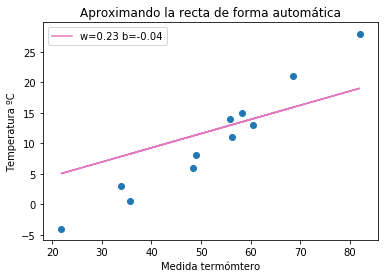

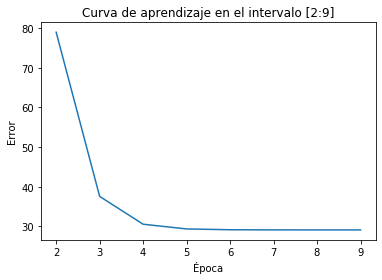

In [133]:
# Visualizamos el resultado del aprendizaje
w,b = params
t_p = model(t_u, w, b)
plt.plot(t_u, t_p, '#e377c2', label=f'w={w:.2f} b={b:.2f}', zorder=1)
plt.scatter(t_u, t_c, zorder=2)

plt.title("Aproximando la recta de forma automática")
plt.ylabel("Temperatura ºC")
plt.xlabel("Medida termómtero")
plt.legend()    
plt.show()

t_x = torch.arange(2, 10)
plt.plot(t_x, t_loss[t_x])
plt.title(f"Curva de aprendizaje en el intervalo [{t_x[0]}:{t_x[-1]}]")
plt.ylabel("Error")
plt.xlabel("Época")
plt.show()

Bueno, la cosa mejora. Aún así, seguimos teniendo problemas. Las actualizaciones son tan pequeñas que llega un momento que el proceso se estanca y el error deja de disminuir, con lo que nos quedamos lejos de una solución ideal.

Podríamos obviar este hecho definiendo un _learning rate_ adaptativo (que cambie en función de la magnitud de las actualizaciones). Sin embargo, tenemos aún otro problema más...

#### 1.10. Normalizando la entrada
---
Si nos fijamos en el gradiente de la primera época, podemos ver como el del peso es unas 50 veces mayor que el de el _bias_. Esto indica que se mueven en espacios de escalado totalmente diferentes, lo que implica que un _learning rate_ suficientemente alto como para modificar uno de los parámetros haría inestable al otro. Del mismo modo, un _learning rate_ pequeño y apropiado para éste, apenas modificaría el primero. 

Podríamos intentar definir un _learning rate_ diferente para cada parámetro, pero esto sería inmanejable en modelos de múltiples parámetros.

La solución a este problema es muy simple: modificando las entradas de forma que los gradientes no sean tan diferentes. Esto lo podemos conseguir fácilmente manteniendo los valores de la entrada en el entorno del rango \[-1.0, 1.0].

Podríamos conseguir algo aproximado a ésto simplemente multiplicando los valores de la entrada por 0.1. 

In [136]:
t_un = 0.1 * t_u
params = torch.tensor([1.0, 0.0])
t_loss, t_params = training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = params,
    t_u = t_un,
    t_c = t_c,
    print_params=True)


Epoch 1: loss 80.364
	Params:	tensor([1.7761, 0.1064]):
	Grad:	tensor([-77.6140, -10.6400])
Epoch 2: loss 37.575
	Params:	tensor([2.0848, 0.1303]):
	Grad:	tensor([-30.8623,  -2.3864])
Epoch 3: loss 30.871
	Params:	tensor([2.2094, 0.1217]):
	Grad:	tensor([-12.4631,   0.8587])
Epoch 4: loss 29.756
	Params:	tensor([2.2616, 0.1004]):
	Grad:	tensor([-5.2218,  2.1327])
Epoch 5: loss 29.507
	Params:	tensor([2.2853, 0.0740]):
	Grad:	tensor([-2.3715,  2.6310])
Epoch 6: loss 29.392
	Params:	tensor([2.2978, 0.0458]):
	Grad:	tensor([-1.2492,  2.8241])
Epoch 7: loss 29.299
	Params:	tensor([2.3059, 0.0168]):
	Grad:	tensor([-0.8071,  2.8970])
Epoch 8: loss 29.209
	Params:	tensor([ 2.3122, -0.0124]):
	Grad:	tensor([-0.6325,  2.9227])
Epoch 9: loss 29.119
	Params:	tensor([ 2.3178, -0.0417]):
	Grad:	tensor([-0.5633,  2.9298])
Epoch 10: loss 29.030
	Params:	tensor([ 2.3232, -0.0710]):
	Grad:	tensor([-0.5355,  2.9295])
Epoch 11: loss 28.942
	Params:	tensor([ 2.3284, -0.1003]):
	Grad:	tensor([-0.5240,  2.9

Vemos como la cosa mejora bastante. Incluso hemos usado nuestro _learning rate_ original de 1e-2 sin que saltara todo por los aires. 

Aunque en un caso tan simple como éste nos basta con hacer esa simple multiplicación de un factor (0.1) por el valor de la entrada, en problemas más complejos se emplean técnicas de normalización que nos ajusten los valores a un rango determinado. Por ejemplo, vamos aplicar normalización estándar a los datos de entrada...

In [143]:
t_un = (t_u - t_u.mean())/t_u.std()
params = torch.tensor([1.0, 0.0])
t_loss, t_params = training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = params,
    t_u = t_un,
    t_c = t_c)
print(t_loss[-1], t_params[-1])

tensor(6.4981) tensor([7.7523, 9.1075])


Se puede comprobar como, para el mismo número de épocas (100), hemos reducido el error de 22.149 a 6.498

No está nada mal! Bueno, vamos a exprimir un poco más el modelo estirando el entrenamiento hasta las 5000 iteraciones y visualizar el resultado final...

tensor(2.9276) tensor([ 9.0349, 10.5000])


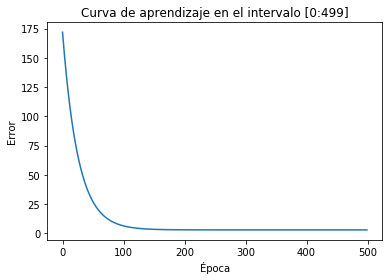

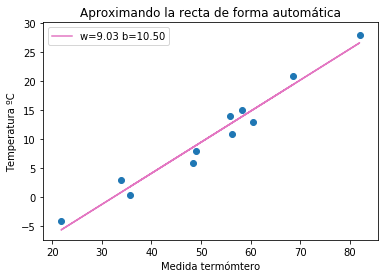

In [153]:
params = torch.tensor([1.0, 0.0])
t_un = (t_u - t_u.mean())/t_u.std()
t_loss, t_params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = params,
    t_u = t_un,
    t_c = t_c)
print(t_loss[-1], t_params[-1])

t_x = torch.arange(0, 500)
plt.plot(t_x, t_loss[t_x])
plt.title(f"Curva de aprendizaje en el intervalo [{t_x[0]}:{t_x[-1]}]")
plt.ylabel("Error")
plt.xlabel("Época")
plt.show()

w,b = t_params[-1]
t_p = model(t_un, w, b) # dado que entrenamos sobre la entrada normalizada,
                        # aplicamos el modelo a la entrada normalizada
plt.plot(t_u, t_p, '#e377c2', label=f'w={w:.2f} b={b:.2f}', zorder=1)
plt.scatter(t_u, t_c, zorder=2)

plt.title("Aproximando la recta de forma automática")
plt.ylabel("Temperatura ºC")
plt.xlabel("Medida termómtero")
plt.legend()    
plt.show()